<a href="https://colab.research.google.com/github/muskaan712/Temp-Prediction_ARIMA/blob/main/Temperature_Forecast_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pmdarima

     |████████████████████████████████| 1.5MB 8.7MB/s 
     |████████████████████████████████| 9.5MB 36.8MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#Read Data

In [ ]:
df=pd.read_csv('/content/MaunaLoaDailyTemps.csv',index_col='DATE',parse_dates=True)
df=df.dropna()


df.head()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758


#Plotting Data

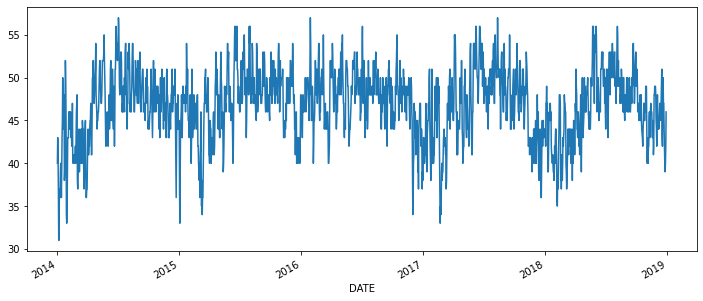

In [ ]:
df['AvgTemp'].plot(figsize=(12,5))

# Stationarity

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [ ]:
adf_test(df['AvgTemp'])

1. ADF :  -6.554680125068777
2. P-Value :  8.675937480199653e-09
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1808
5. Critical Values :
	 1% :  -3.433972018026501
	 5% :  -2.8631399192826676
	 10% :  -2.5676217442756872


# Order for ARIMA Model

In [ ]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
stepwise_fit = auto_arima(df['AvgTemp'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=8344.973, Time=3.35 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10347.755, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=8365.701, Time=0.21 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=9136.225, Time=0.38 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19192.139, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=8355.947, Time=2.72 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=8356.308, Time=2.65 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=8347.286, Time=3.84 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=8317.061, Time=3.85 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=8330.189, Time=3.58 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=8312.274, Time=4.57 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=8332.188, Time=4.85 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=8317.476, Time=5.43 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=8305.681, Time=5.14 sec
 ARIMA(1,0,4)(0,0,0)[0] interce

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

#Split Data in Training and Testing

In [ ]:
print(df.shape)
train=df.iloc[:-360]
test=df.iloc[-360:]
print(train.shape,test.shape)
print(test.iloc[0],test.iloc[-1])

(1821, 5)
(1461, 5) (360, 5)
MinTemp      39.0
MaxTemp      55.0
AvgTemp      47.0
Sunrise     658.0
Sunset     1757.0
Name: 2018-01-04 00:00:00, dtype: float64 MinTemp      39.0
MaxTemp      52.0
AvgTemp      46.0
Sunrise     656.0
Sunset     1754.0
Name: 2018-12-30 00:00:00, dtype: float64


## Train the Model

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train['AvgTemp'],order=(1,0,5))
model=model.fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1461
Model:                     ARMA(1, 5)   Log Likelihood               -3343.999
Method:                       css-mle   S.D. of innovations              2.385
Date:                Fri, 23 Apr 2021   AIC                           6703.999
Time:                        21:21:39   BIC                           6746.294
Sample:                             0   HQIC                          6719.776
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            46.5255      0.858     54.215      0.000      44.844      48.207
ar.L1.AvgTemp     0.9845      0.009    114.305      0.000       0.968       1.001
ma.L1.AvgTemp    -0.1313      0.028     -4.723      0.000      -0.186      -0.077
ma.L2.AvgTemp    -0.2446      0.028     -8.885      0.000      -0.299      -0.191
ma.L3.AvgTemp    -0.2050      0.029     -7.048      0.000      -0.262      -0.148
ma.L4.AvgTemp    -0.1476      0.027     -5.498      0.000      -0.200      -0.095
ma.L5.AvgTemp    -0.0589      0.028     -2.107      0.035      -0.114      -0.004
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0157           +0.0000j            1.0157            0.0000
MA.1            1.0906           -0.0000j            1.0906           -0.0000
MA.2            0.0750           -1.8543j            1.8559           -0.2436
MA.3            0.0750           +1.8543j            1.8559            0.2436
MA.4           -1.8723           -1.0054j            2.1252           -0.4216
MA.5           -1.8723           +1.0054j            2.1252            0.4216
-----------------------------------------------------------------------------
"""

# Predictions on Test Set

In [ ]:
end=len(test)-1
#if the predicted values dont have date values as index, you will have to uncomment the following two commented lines to plot a graph
index_future_dates=pd.date_range(start='2018-12-01',end='2019-11-25')
pred=model.predict(start=0,end=end,typ='none').rename('ARIMA predictions')
pred.index=index_future_dates
print(pred)

2018-12-01    46.525514
2018-12-02    41.195908
2018-12-03    43.976389
2018-12-04    41.708687
2018-12-05    38.275472
                ...    
2019-11-21    40.583065
2019-11-22    38.895642
2019-11-23    43.651738
2019-11-24    47.959773
2019-11-25    46.856899
Freq: D, Name: ARIMA predictions, Length: 360, dtype: float64


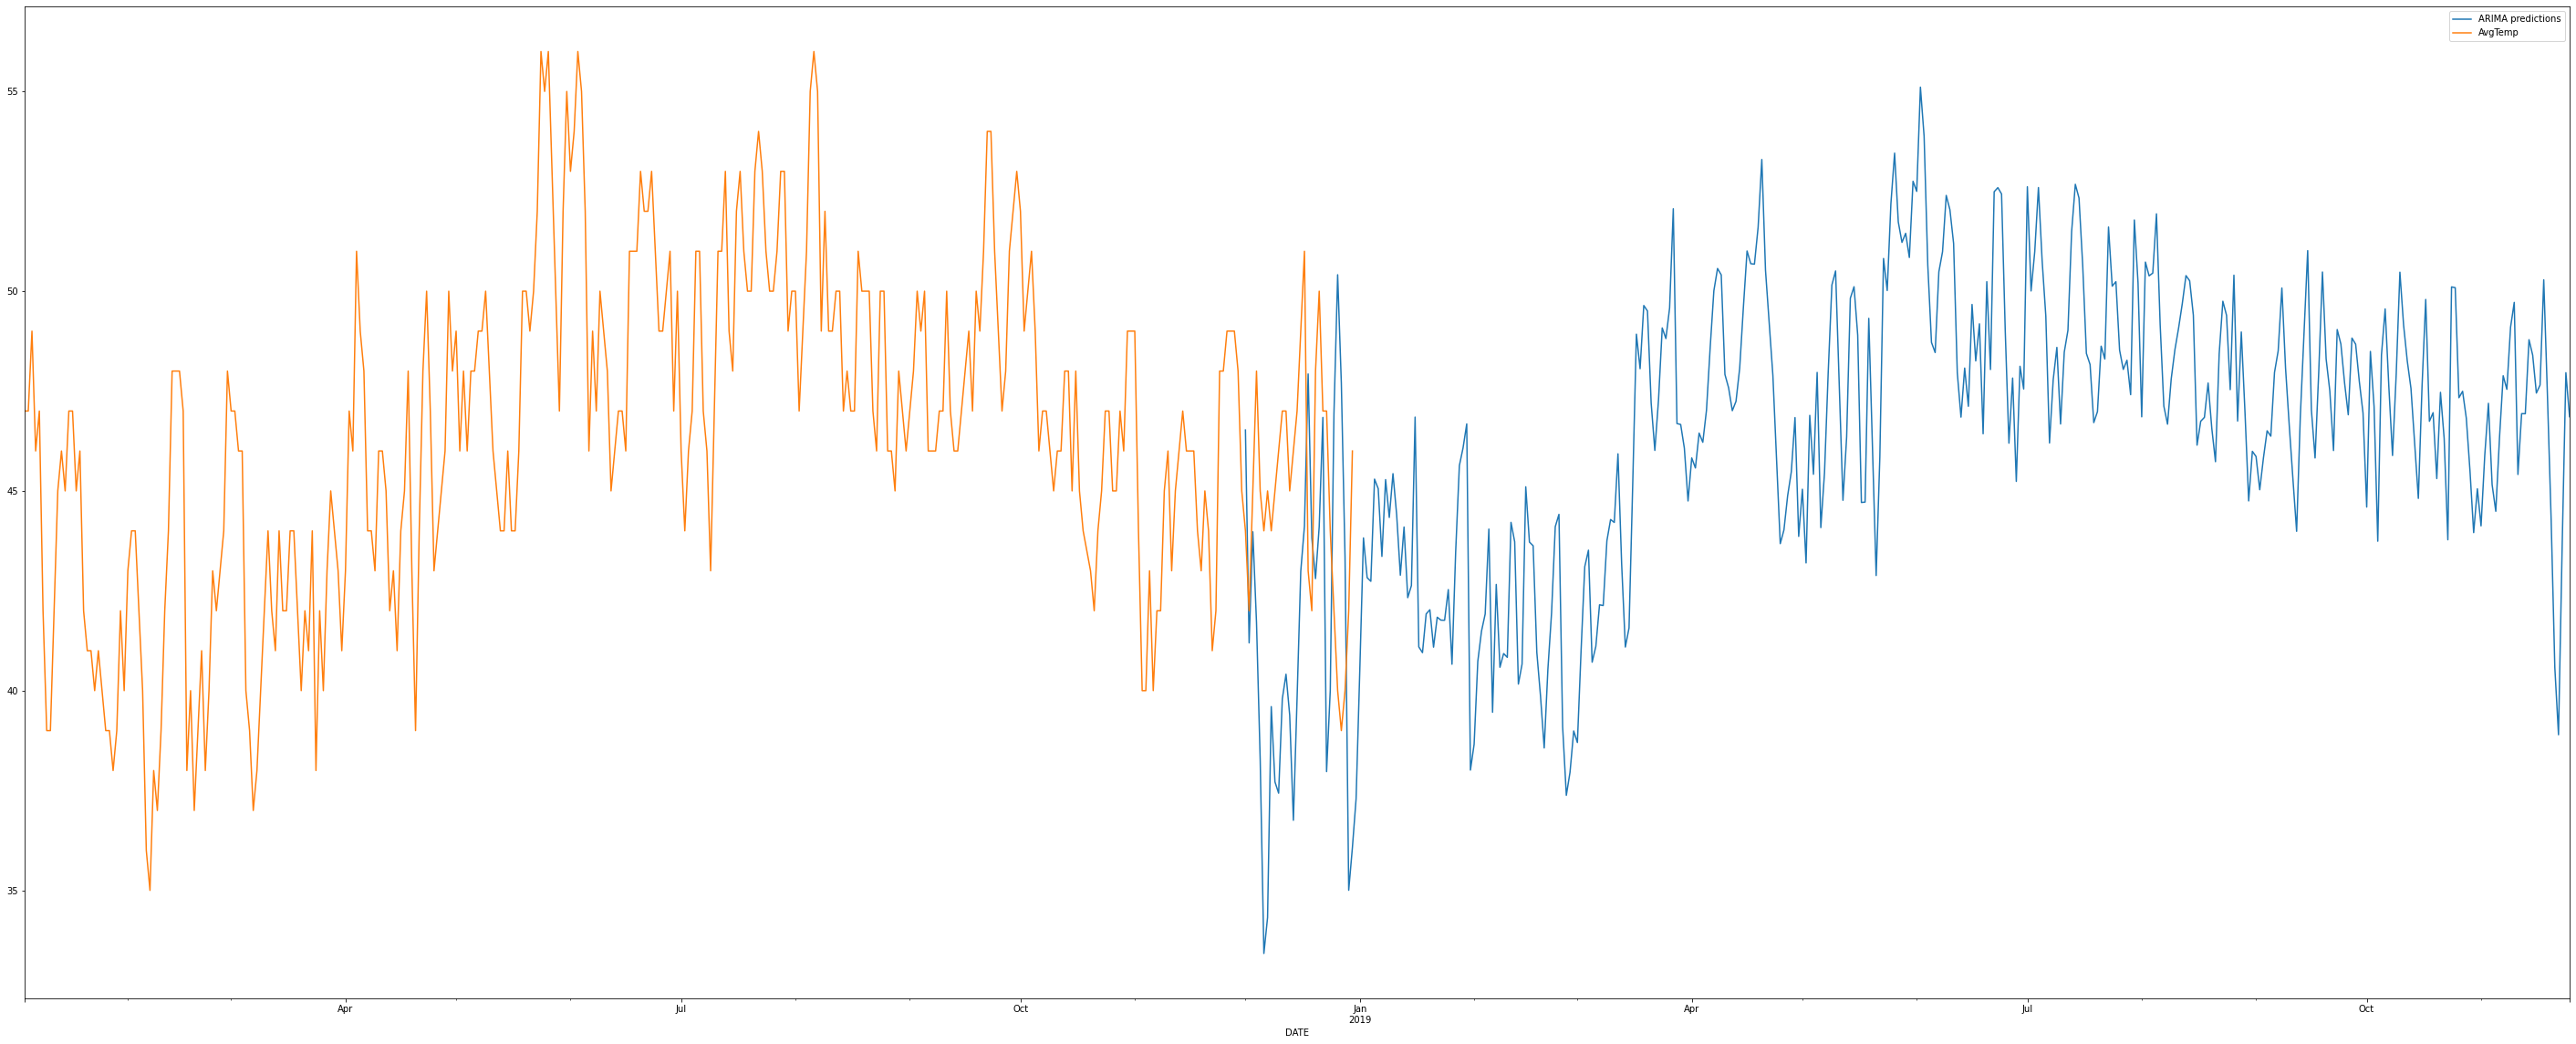

In [47]:
pred.plot(legend='ARIMA Predictions')
test['AvgTemp'].plot(legend=True, figsize=(50,20))

In [ ]:
test['AvgTemp'].mean()

46.34166666666667

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['AvgTemp']))

print(rmse)



4.097937287258066
